# Home Credit Default Risk

Using various statistical and machine learning methods via a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

This is my first Kaggle competition. Many thanks to lots of great notebooks on Kaggle. Credits to kernel shared by<br>

* **Serigne**  [Stacked Regressions : Top 4% on LeaderBoard](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard)
* **Pavan Raj**  [Loan repayers v/s Loan defaulters - HOME CREDIT](https://www.kaggle.com/pavanraj159/loan-repayers-v-s-loan-defaulters-home-credit)
* **Megan McGeeIntro** [Home Credit Default Risk](https://www.kaggle.com/frizzles7/intro-home-credit-default-risk)
* **olivier**  [Good_fun_with_LightGBM](https://www.kaggle.com/ogrellier/good-fun-with-ligthgbm)

## Content

* [1. Prepare the dataset](#1.-Prepare-the-dataset)
* [2. Exploratory data analysis](#2.-Exploratory-data-analysis)
* [3. Algorithms](#3.-Algorithms)
	* [3.1 Base Models](#3.1-Base-Models)
	* [3.2 Stacking Models](#3.2-Stacking-Models) 
* [4. Submit](#4.-Submit)

## 1. Prepare the dataset

In [1]:
# change the working directory
import os
os.getcwd()

# os.chdir('../Home Credit Default Risk')

'C:\\Users\\lexsis\\Desktop\\project\\Home Credit Default Risk'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
%matplotlib inline

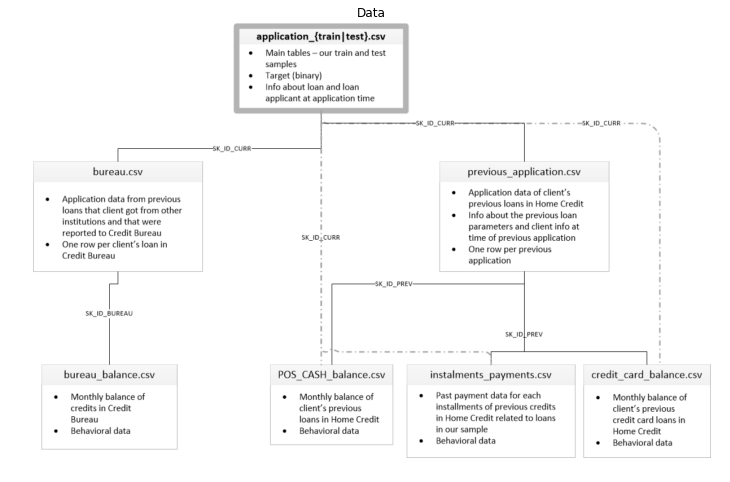

In [3]:
# A quick look at the descriptions for the columns in the various data files
image = np.array(Image.open('../Home Credit Default Risk/input/home_credit.png'))
fig = plt.figure(figsize=(15,8))
plt.imshow(image,interpolation='bilinear')
plt.axis('off')
plt.title('Data')
plt.show()

### Definition of Variables

Provided by **Tuananhkk** [More domain knowledge from former Home Credit analyst](https://www.kaggle.com/c/home-credit-default-risk/discussion/63032) <br>

**POS** Point of sales loan <br>
**AMT_GOODS_PRICE** The price of the goods <br>
**AMT_DOWN_PAYMENT** Out of pocket <br>
**AMT_INSTALMENT** Monthly repayment including principle and interest; also called **AMT_ANNUITY** <br>
**AMT_CREDIT** Whole principle of the loan <br>
**DUE_DATE** The installment needs to be paid  <br>
**CNT** count <br>
**AMT** amount <br>
**FLAG** a binary variable <br>
**OBS** observation, also means "is it time for?" <br>
**DEF** actual default <br>
**DAYS** number of days <br>
**NUM** sequence number <br>
**x-sell** customers that already has loan with HC <br>
**walk in** new customer as this is the first time loan; same meaning **Street** <br>

In [2]:
# Load the dataset
application_train     = pd.read_csv('../Home Credit Default Risk/input/application_train.csv')
application_test      = pd.read_csv('../Home Credit Default Risk/input/application_test.csv')
bureau                = pd.read_csv('../Home Credit Default Risk/input/bureau.csv')
bureau_balance        = pd.read_csv('../Home Credit Default Risk/input/bureau_balance.csv')
credit_card_balance   = pd.read_csv('../Home Credit Default Risk/input/credit_card_balance.csv')
installments_payments = pd.read_csv('../Home Credit Default Risk/input/installments_payments.csv')
pos_cash_balance      = pd.read_csv('../Home Credit Default Risk/input/POS_CASH_balance.csv')
previous_application  = pd.read_csv('../Home Credit Default Risk/input/previous_application.csv')

In [5]:
print ('application_train     :',application_train.shape)
print ('application_test      :',application_test.shape)
print ('bureau                :',bureau.shape)
print ('bureau_balance        :',bureau_balance.shape)
print ('credit_card_balance   :',credit_card_balance.shape)
print ('installments_payments :',installments_payments.shape)
print ('pos_cash_balance      :',pos_cash_balance.shape)
print ('previous_application  :',previous_application.shape)

application_train     : (307511, 122)
application_test      : (48744, 121)
bureau                : (1716428, 17)
bureau_balance        : (27299925, 3)
credit_card_balance   : (3840312, 23)
installments_payments : (13605401, 8)
pos_cash_balance      : (10001358, 8)
previous_application  : (1670214, 37)


In [6]:
display('application_train')
display(application_train.head(3))
display('application_test')
display(application_test.head(3))
display('bureau')
display(bureau.head(3))
display('bureau_balance')
display(bureau_balance.head(3))
display('credit_card_balance')
display(credit_card_balance.head(3))
display('installments_payments')
display(installments_payments.head(3))
display('pos_cash_balance')
display(pos_cash_balance.head(3))
display('previous_application')
display(previous_application.head(3))

'application_train'

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


'application_test'

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0


'bureau'

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN


'bureau_balance'

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C


'credit_card_balance'

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0


'installments_payments'

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000


'pos_cash_balance'

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0


'previous_application'

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0


## 2. Exploratory data analysis

### application_train & application_test

In [7]:
print ('application_train:',application_train.shape)
application_train.describe()

application_train: (307511, 122)


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [8]:
print ('application_test:',application_test.shape)
display(application_test.describe())

application_test: (48744, 121)


,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


In [3]:
# join train and test dataset for convenience
train_len = len(application_train)
dataset = pd.concat(objs=[application_train, application_test], axis=0).reset_index(drop=True)
print(dataset.shape)

(356255, 122)


Text(0.5,1,'Count of Target Variable')

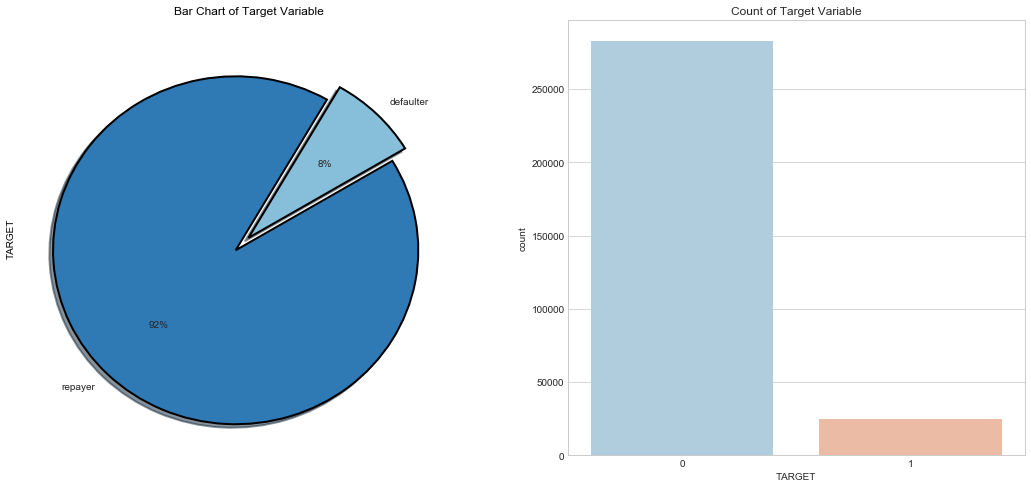

In [10]:
plt.figure(figsize=(18,8))

plt.subplot(121)
sns.set_style('whitegrid')
application_train["TARGET"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("RdBu_r"),startangle = 60,labels=["repayer","defaulter"],
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
plt.title('Bar Chart of Target Variable')

plt.subplot(122)
sns.countplot(x='TARGET',data=application_train,palette='RdBu_r')
plt.title('Count of Target Variable')

look at individual variables for further information

###  CNT_CHILDREN

In [11]:
application_train['CNT_CHILDREN'].describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

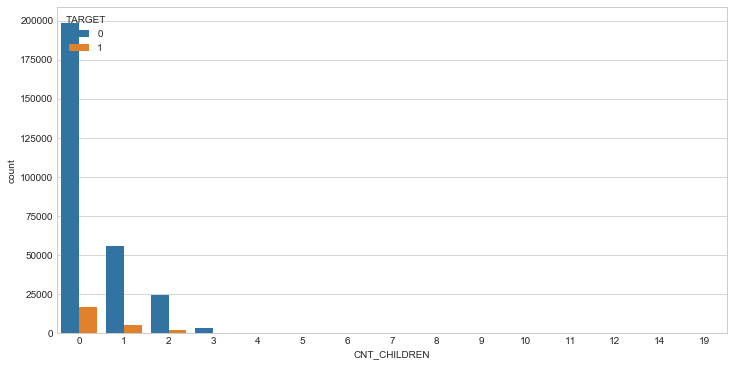

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'CNT_CHILDREN', hue = 'TARGET', data = application_train)

Text(0.5,1,'Default Probability')

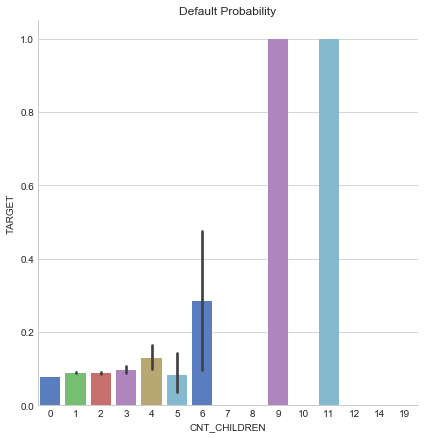

In [13]:
# plot CNT_CHILDREN against the TARGET to better understand the data
sns.factorplot(x='CNT_CHILDREN', y='TARGET', data=application_train, kind="bar", size = 6, palette = "muted")
plt.title("Default Probability")

In [14]:
print('Default probability of children count > 5: %0.2f%%' % application_train[application_train['CNT_CHILDREN'] > 5]['TARGET'].mean())
print('Default probability of children count < 6: %0.2f%%' % application_train[application_train['CNT_CHILDREN'] < 6]['TARGET'].mean())

Default probability of children count > 5: 0.21%
Default probability of children count < 6: 0.08%


In [15]:
dataset[dataset['CNT_CHILDREN'] > 5]['CNT_CHILDREN'].count()

52

In [4]:
dataset['CNT_CHILDREN_outlier'] = [1 if x > 5 else 0 for x in dataset['CNT_CHILDREN']]

In [17]:
dataset['CNT_CHILDREN_outlier'].sum()

52

###  AMT_INCOME_TOTAL / AMT_CREDIT / AMT_ANNUITY / AMT_GOODS_PRICE

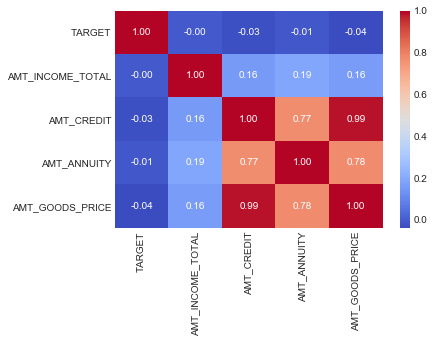

In [18]:
sns.heatmap(application_train[['TARGET','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

### OBS_30_CNT_SOCIAL_CIRCLE / DEF_30_CNT_SOCIAL_CIRCLE / OBS_60_CNT_SOCIAL_CIRCLE / DEF_60_CNT_SOCIAL_CIRCLE

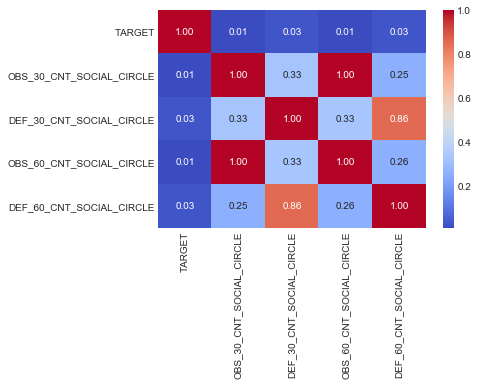

In [19]:
sns.heatmap(application_train[['TARGET','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

have to deal with correlated variables later

Text(0.5,1,'application_train')

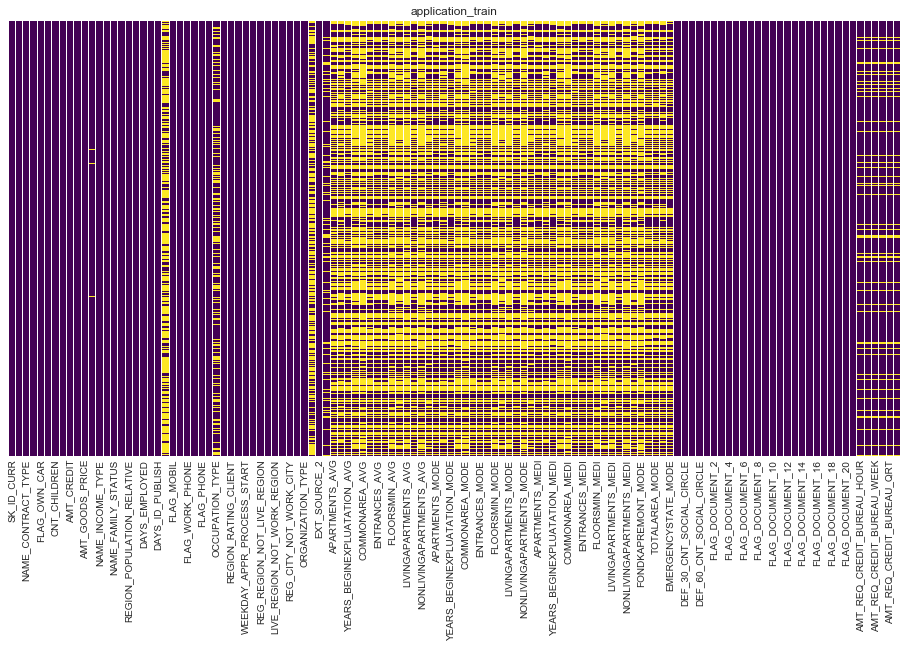

In [20]:
# missing data in application_train
plt.figure(figsize=(16,8))
sns.heatmap(application_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title("application_train")

Text(0.5,1,'application_test')

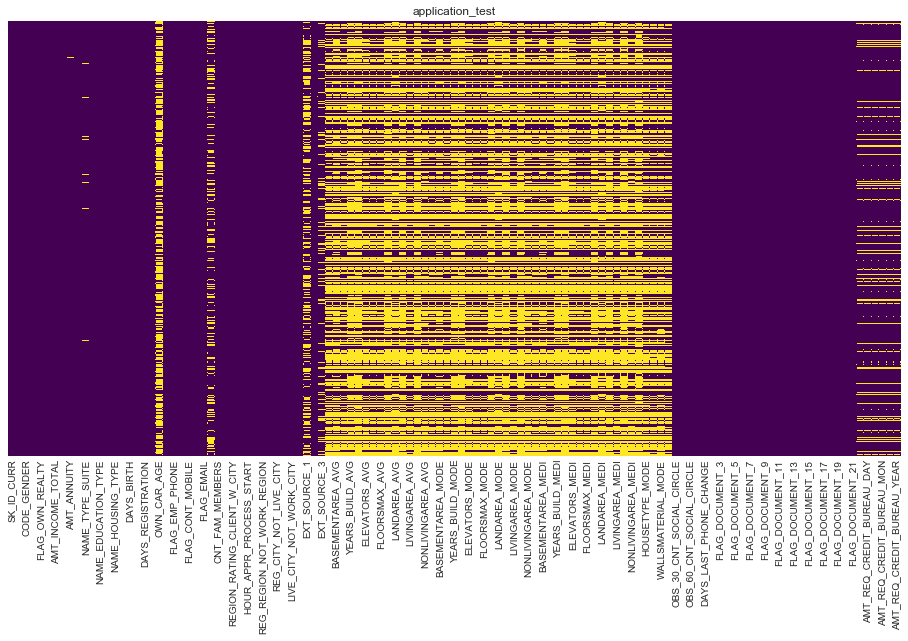

In [21]:
# missing data in application_test
plt.figure(figsize=(16,8))
sns.heatmap(application_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title("application_test")

similar pattern of missing data in train & test dataset

In [ ]:
# df1['A'].plot.bar(stacked=True)
# sns.pairplot(df[["mpg", "horsepower", "weight", "origin"]], hue="origin", diag_kind="hist")
# sns.jointplot(data=application_train,alpha=0.5)

### Encoding Categorical Variables

In [5]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, Imputer

# Label encoding: convert each value in a column to a number 
labelencoder = LabelEncoder()
count = 0

for col in dataset:
    if dataset[col].dtype == 'object':
        if len(list(dataset[col].unique())) == 2:
            labelencoder.fit(dataset[col])
            dataset[col] = labelencoder.transform(dataset[col])
            count += 1

In [6]:
# get dummies for categorical variables
dataset = pd.get_dummies(dataset, drop_first=True) 
# n-1 dummies for n categories to avoid dummy variable trap a.k.a. multicollinearity

In [24]:
print(dataset.shape)

(356255, 231)


#### bureau & bureau_balance

In [7]:
# bureau.csv
bureau_cat = [f_ for f_ in bureau.columns if bureau[f_].dtype == 'object']
dummy_bureau = pd.get_dummies(bureau, columns=bureau_cat, drop_first=True)

In [8]:
# bureau_balance.csv
bureau_balance_cat = [f_ for f_ in bureau_balance.columns if bureau_balance[f_].dtype == 'object']
dummy_bureau_balance = pd.get_dummies(bureau_balance, columns=bureau_balance_cat, drop_first=True)

avg_bureau_balance = dummy_bureau_balance.groupby('SK_ID_BUREAU').mean()

In [9]:
# reshape bureau
bureau_all = dummy_bureau.merge(right=avg_bureau_balance.reset_index(), how='left', on='SK_ID_BUREAU', suffixes=('', '_balance_'))

bureau_count = bureau_all[['SK_ID_CURR', 'SK_ID_BUREAU']].groupby('SK_ID_CURR').count()
bureau_all['SK_ID_BUREAU'] = bureau_all['SK_ID_CURR'].map(bureau_count['SK_ID_BUREAU'])

avg_bureau = bureau_all.groupby('SK_ID_CURR').mean()

In [10]:
del dummy_bureau, dummy_bureau_balance, avg_bureau_balance, bureau_all, bureau_count

#### pos_cash_balance 

In [11]:
# pos_cash_balance.csv
pos_cash_balance_cat = [f_ for f_ in pos_cash_balance.columns if pos_cash_balance[f_].dtype == 'object']
dummy_pos_cash_balance = pd.get_dummies(pos_cash_balance, columns=pos_cash_balance_cat, drop_first=True)

In [12]:
# reshape pos_cash_balance
pos_cash_count = dummy_pos_cash_balance[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
dummy_pos_cash_balance['SK_ID_PREV'] = dummy_pos_cash_balance['SK_ID_CURR'].map(pos_cash_count['SK_ID_PREV'])

avg_pos_cash = dummy_pos_cash_balance.groupby('SK_ID_CURR').mean()

In [13]:
del dummy_pos_cash_balance, pos_cash_count

#### credit_card_balance

In [14]:
#credit_card_balance.csv
credit_card_balance_cat = [f_ for f_ in credit_card_balance.columns if credit_card_balance[f_].dtype == 'object']
dummy_credit_card_balance = pd.get_dummies(credit_card_balance, columns=credit_card_balance_cat, drop_first=True)

In [15]:
# reshape credit_card_balance
credit_card_count = dummy_credit_card_balance[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
dummy_credit_card_balance['SK_ID_PREV'] = dummy_credit_card_balance['SK_ID_CURR'].map(credit_card_count['SK_ID_PREV'])

avg_credit_card = dummy_credit_card_balance.groupby('SK_ID_CURR').mean()

In [16]:
del dummy_credit_card_balance, credit_card_count

#### previous_application

In [17]:
# previous_application.csv
previous_application_cat = [f_ for f_ in previous_application.columns if previous_application[f_].dtype == 'object']
dummy_previous_application = pd.get_dummies(previous_application, columns=previous_application_cat, drop_first=True)

In [18]:
# reshape previous_application
previous_application_count = dummy_previous_application[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
dummy_previous_application['SK_ID_PREV'] = dummy_previous_application['SK_ID_CURR'].map(previous_application_count['SK_ID_PREV'])

avg_previous_application = dummy_previous_application.groupby('SK_ID_CURR').mean()

In [19]:
del dummy_previous_application, previous_application_count

#### installments_payments

In [20]:
# installments_payments.csv
installments_payments_cat = [f_ for f_ in installments_payments.columns if installments_payments[f_].dtype == 'object']
dummy_installments_payments = pd.get_dummies(installments_payments, columns=installments_payments_cat, drop_first=True)

In [21]:
# reshape installments_payments
installments_payments_count = dummy_installments_payments[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
dummy_installments_payments['SK_ID_PREV'] = dummy_installments_payments['SK_ID_CURR'].map(installments_payments_count['SK_ID_PREV'])

avg_installments_payments = dummy_installments_payments.groupby('SK_ID_CURR').mean()

In [22]:
del dummy_installments_payments, installments_payments_count

In [23]:
# merge dataset
dataset = dataset.merge(right=avg_bureau.reset_index(), how='left', on='SK_ID_CURR')
dataset = dataset.merge(right=avg_pos_cash.reset_index(), how='left', on='SK_ID_CURR')
dataset = dataset.merge(right=avg_credit_card.reset_index(), how='left', on='SK_ID_CURR')
dataset = dataset.merge(right=avg_previous_application.reset_index(), how='left', on='SK_ID_CURR')
dataset = dataset.merge(right=avg_installments_payments.reset_index(), how='left', on='SK_ID_CURR')

### missing variable 

In [24]:
# closer look at missing data in dataset
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
RATE_INTEREST_PRIVILEGED,350534,0.983941
RATE_INTEREST_PRIMARY,350534,0.983941
AMT_PAYMENT_CURRENT,284135,0.797561
AMT_DRAWINGS_OTHER_CURRENT,284061,0.797353
CNT_DRAWINGS_OTHER_CURRENT,284061,0.797353
CNT_DRAWINGS_POS_CURRENT,284061,0.797353
AMT_DRAWINGS_POS_CURRENT,284061,0.797353
CNT_DRAWINGS_ATM_CURRENT,284061,0.797353
AMT_DRAWINGS_ATM_CURRENT,284061,0.797353
AMT_DRAWINGS_CURRENT,252697,0.709315


In [43]:
dataset.shape

(356255, 467)

In [25]:
# deal with missing variables
dataset = dataset.drop((missing_data[missing_data['Percent'] > 0.6]).index,1)

In [45]:
dataset.shape

(356255, 412)

### correlation

In [26]:
# drop variable with correlation > 0.9
corr_matrix = dataset.corr().abs()
upper_corr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
drop_cols = [column for column in upper_corr.columns if any(upper_corr[column] > 0.9)]
dataset = dataset.drop(columns = drop_cols)

In [47]:
dataset.shape

(356255, 369)

### replace 

In [48]:
# replace na with mean
dataset.fillna(dataset.mean(), inplace=True)

In [49]:
dataset.shape

(356255, 369)

## 3. Algorithms

**Cross-validation**

In [27]:
# split train and test dataset
train = dataset[:train_len]
test = dataset[train_len:]

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = train.drop(['SK_ID_CURR', 'TARGET'], axis = 1)
y = train['TARGET']

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [29]:
print ("X:    ", X.shape)
print ("y:    ", y.shape)
print ("test: ", test.shape)

X:     (307511, 367)
y:     (307511,)
test:  (48744, 369)


In [38]:
x_test = test.drop(['SK_ID_CURR', 'TARGET'], axis = 1)

### 3.2 Base Models

In [30]:
import lightgbm as lgb
train_data=lgb.Dataset(x_train,label=y_train)
test_data=lgb.Dataset(x_val,label=y_val)

In [31]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'binary_logloss', 'auc'},
    'metric_freq': 1,
    'is_training_metric': True,
    'max_bin': 255,
    'learning_rate': 0.1,
    'num_leaves': 63,
    'tree_learner': 'serial',
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'min_data_in_leaf': 50,
    'min_sum_hessian_in_leaf': 5,
    'is_enable_sparse': True,
    'use_two_round_loading': False,
    'is_save_binary_file': False,
    'num_machines': 1,
    'verbose': 0,
    'subsample_for_bin': 200000,
    'min_child_samples': 20,
    'min_child_weight': 0.001,
    'min_split_gain': 0.0,
    'colsample_bytree': 1.0,
    'reg_alpha': 0.0,
    'reg_lambda': 0.0
}

In [33]:
lgbm2 = lgb.train(params, train_data, 2000, valid_sets=test_data, early_stopping_rounds= 40, verbose_eval= 10)

Training until validation scores don't improve for 40 rounds.
[10]	valid_0's auc: 0.743026	valid_0's binary_logloss: 0.25545
[20]	valid_0's auc: 0.751902	valid_0's binary_logloss: 0.249051
[30]	valid_0's auc: 0.759792	valid_0's binary_logloss: 0.245926
[40]	valid_0's auc: 0.764516	valid_0's binary_logloss: 0.244119
[50]	valid_0's auc: 0.767485	valid_0's binary_logloss: 0.243054
[60]	valid_0's auc: 0.769562	valid_0's binary_logloss: 0.242363
[70]	valid_0's auc: 0.770626	valid_0's binary_logloss: 0.241991
[80]	valid_0's auc: 0.771361	valid_0's binary_logloss: 0.241727
[90]	valid_0's auc: 0.771612	valid_0's binary_logloss: 0.241647
[100]	valid_0's auc: 0.771805	valid_0's binary_logloss: 0.241494
[110]	valid_0's auc: 0.771814	valid_0's binary_logloss: 0.241504
[120]	valid_0's auc: 0.772041	valid_0's binary_logloss: 0.241491
[130]	valid_0's auc: 0.771915	valid_0's binary_logloss: 0.241537
[140]	valid_0's auc: 0.771272	valid_0's binary_logloss: 0.241731
[150]	valid_0's auc: 0.770904	valid_0'

In [34]:
prediction = lgbm2.predict(x_val)

In [36]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_val, prediction)
print("Accuracy score: {:.3f}" .format(score))

Accuracy score: 0.772


## 4. Submit

In [39]:
predict2 = lgbm2.predict(x_test)
submit = pd.DataFrame()
submit['SK_ID_CURR'] = application_test['SK_ID_CURR']
submit['TARGET'] = predict2
submit.to_csv("submission2.csv", index=False)
submit.head()

,SK_ID_CURR,TARGET
0,100001,0.036283
1,100005,0.108200
2,100013,0.029630
3,100028,0.040400
4,100038,0.162331
